The below dataset consists of information pertaining to basic details of employees using which basic operations of data retrieval using NUMPY is done

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('emp_health (1).csv')
df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


## How many employees above 50 age smoke, what is their average expenditure on health management?

In [3]:
smoking_employees=df[(df['age']>50)&(df['smoke']=='yes')]
smoking_employees

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
11,i10023,62,female,26.290,0,daily,yes,south,27808.72510
39,i10051,60,male,39.900,0,daily,yes,southwest,48173.36100
55,i10067,58,male,36.955,2,weekend,yes,northwest,47496.49445
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020
86,i10098,57,female,31.160,0,no,yes,northwest,43578.93940
...,...,...,...,...,...,...,...,...,...
1265,i11277,64,male,23.760,0,weekend,yes,southeast,26926.51440
1284,i11296,61,male,36.300,1,daily,yes,southwest,47403.88000
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1321,i11333,62,male,26.695,0,daily,yes,east,28101.33305


In [10]:
print(f'THERE ARE {smoking_employees.shape[0]} NO.OF.EMPLOYEES WHO ARE ABOVE THE AGE OF 50 AND THEY SMOKE' )

THERE ARE 64 NO.OF.EMPLOYEES WHO ARE ABOVE THE AGE OF 50 AND THEY SMOKE


In [16]:
print(f"THE AVERAGE EXPENDITURE ON HEALTH MANAGEMENT IS {smoking_employees['expenditure'].mean()}")

THE AVERAGE EXPENDITURE ON HEALTH MANAGEMENT IS 38820.22308234375


## How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [17]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [26]:
female=df[(df['sex']=='female')&(df['alcohol']!='daily')]
female

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
5,i10017,31,female,25.74,0,no,no,south,3756.62160
7,i10019,37,female,27.74,3,weekend,no,northwest,7281.50560
9,i10021,60,female,25.84,0,no,no,northwest,28923.13692
13,i10025,56,female,39.82,0,weekend,no,south,11090.71780
16,i10028,52,female,30.78,1,party,no,north,10797.33620
...,...,...,...,...,...,...,...,...,...
1330,i11342,57,female,25.74,2,no,no,southeast,12629.16560
1332,i11344,52,female,44.70,3,party,no,southwest,11411.68500
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.80,0,party,no,southwest,2007.94500


In [21]:
print(f'female employees who did not consume alcohol daily are {female.shape[0]}')

female employees who did not consume alcohol daily are 453


In [29]:
# proportion
len(female)/len(df[df['sex']=='female'])

0.6842900302114804

## Display zone wise average expenditure of employees on health

In [30]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [33]:
df.groupby('zone')['expenditure'].mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

## Employees of which zone did maximum expenditure on health

In [38]:
df.groupby('zone')['expenditure'].max().sort_values(ascending=False).head(1)

zone
southeast    63770.42801
Name: expenditure, dtype: float64

## What is the minimum expenditure done by any employee in organization

In [41]:
df.groupby('id')['expenditure'].min().sort_values().head(1)

id
i10952    1121.8739
Name: expenditure, dtype: float64

## What is average expenditure of employees who have 2 or lesser dependents

In [42]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [43]:
dependents=df[df['dependent']<=2]
dependents

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
...,...,...,...,...,...,...,...,...,...
1331,i11343,23,female,33.400,0,daily,no,southwest,10795.93733
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [50]:
print(f"THE AVG EXPENDITURE IS {round(dependents['expenditure'].mean(),2)}")

THE AVG EXPENDITURE IS 13040.97


## How many employees are below age of 20 years. What is their average BMI

In [52]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [53]:
below_20=df[df['age']<20]
below_20

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
15,i10027,19,male,24.600,1,party,no,southwest,1837.23700
22,i10034,18,male,34.100,0,daily,no,south,1137.01100
31,i10043,18,female,26.315,0,daily,no,north,2198.18985
...,...,...,...,...,...,...,...,...,...
1315,i11327,18,male,28.310,1,weekend,no,east,11272.33139
1316,i11328,19,female,20.600,0,weekend,no,southwest,1731.67700
1317,i11329,18,male,53.130,0,party,no,southeast,1163.46270
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080


In [56]:
print(f"AVG BMI OF EMPLOYEES LESS THAN 20 YEARS IS {round(below_20['bmi'].mean(),2)}")

AVG BMI OF EMPLOYEES LESS THAN 20 YEARS IS 29.97


##  Create a dataframe "non_smoker" for all non-smoker male employees

In [57]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [59]:
non_smoker=df[(df['sex']=='male')&(df['smoke']=='no')]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


In [60]:
non_smoker.shape[0]

517

## Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [61]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [62]:
df['alcohol'].value_counts()

daily      395
weekend    347
party      278
no         259
rarely      59
Name: alcohol, dtype: int64

In [63]:
non_alcoholic=df[(df['sex']=='male')&(df['alcohol']=='no')]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [64]:
non_alcoholic.shape[0]

147

## Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol.
The dataframe should contain columns id, smoke, alcohol

In [65]:
non_smoking_alcoholic=pd.merge(non_smoker,non_alcoholic,how='inner')
non_smoking_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10030,56,male,40.300,0,no,no,southwest,10602.38500
1,i10036,37,male,28.025,2,no,no,northwest,6203.90175
2,i10040,23,male,17.385,1,no,no,northwest,2775.19215
3,i10049,26,male,20.800,0,no,no,southwest,2302.30000
4,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
104,i11273,28,male,37.100,1,no,no,southwest,3277.16100
105,i11282,26,male,33.915,1,no,no,west,3292.52985
106,i11322,42,male,26.315,1,no,no,west,6940.90985
107,i11332,31,male,31.065,3,no,no,west,5425.02335


In [67]:
non_smoking_alcoholic[['id','smoke','alcohol']]

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


In [69]:
# retrieving id,smoke,alcohol using loc
non_smoking_alcoholic.loc[:,['id','smoke','alcohol']]

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


In [70]:
# retrieving id,smoke,alcohol using iloc
non_smoking_alcoholic.iloc[:,[0,5,6]]

,id,alcohol,smoke
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


## What is the count for each zone with respect to number of dependent

In [72]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [73]:
df.groupby('zone')['dependent'].count()

zone
east         262
north         70
northeast     74
northwest    145
south         84
southeast    198
southwest    251
west         254
Name: dependent, dtype: int64

## 12. Classify the employees into 3 categories.
 ## Category 1 : employees below 18.5 bmi - underweight
 ## Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 ## Category 3 : employee with bmi over 24.9 - overweight
 ## What is the average expenditure of employees in each category.
 ## Display the bar chart for the same


In [74]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [75]:
df['category']=df['bmi'].apply(lambda x:'underweight' if x<18.5 else 'fit' if ((x>18.5)&(x<=24.9)) else 'overweight')

In [76]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240,overweight
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523,overweight


In [83]:
df['category'].value_counts()


overweight     1097
fit             221
underweight      20
Name: category, dtype: int64

In [84]:
a=df.groupby('category')['expenditure'].mean()
a

category
fit            10404.900084
overweight     13928.257120
underweight     8852.200585
Name: expenditure, dtype: float64

<AxesSubplot:xlabel='category'>

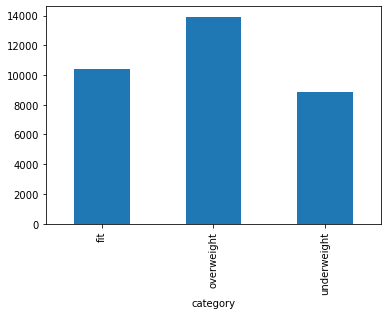

In [85]:
a.plot(kind='bar')

## Draw line plot of expenditure against age and BMI

<AxesSubplot:xlabel='expenditure', ylabel='age'>

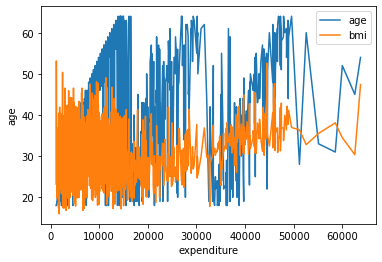

In [86]:
x=df['expenditure']
y1=df['age']
y2=df['bmi']
sns.lineplot(df['expenditure'],df['age'],label='age')
sns.lineplot(df['expenditure'],df['bmi'],label='bmi')

1. People with age of 46 years and bmi around 55 have expenditure above 60000
2. People with age >60 have expenditure between 11000 & 15000
3. people with age and bmi less than 20 have expenditure between 0-10000

## Draw a bar chart to show zone wise average expenditure

In [87]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240,overweight
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523,overweight


In [89]:
ex=df.groupby('zone')['expenditure'].mean()
ex

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

Text(0, 0.5, 'expenditure')

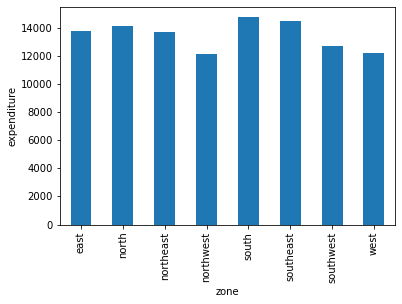

In [91]:
ex.plot(kind='bar')
plt.xlabel('zone')
plt.ylabel('expenditure')

- south and southeast zone people have the maximum expenditure

##  Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [92]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240,overweight
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523,overweight


In [95]:
c=df.groupby(['smoke','alcohol'])['expenditure'].mean()
c

smoke  alcohol
no     daily       8462.115558
       no          8628.618182
       party       8295.247250
       rarely      5785.022944
       weekend     8784.631185
yes    daily      31160.402608
       no         32224.657378
       party      31487.938163
       rarely     31881.367379
       weekend    33592.294629
Name: expenditure, dtype: float64

Text(0, 0.5, 'expenditure')

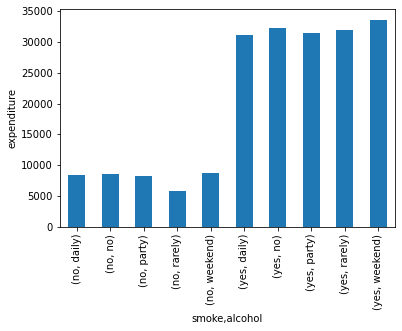

In [97]:
c.plot(kind='bar')
plt.ylabel('expenditure')

## Draw pie chart for alcohol consumption habits

In [98]:
df.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240,overweight
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523,overweight


<AxesSubplot:ylabel='alcohol'>

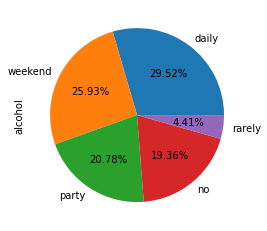

In [101]:
df['alcohol'].value_counts().plot(kind='pie',autopct='%.2f%%')

## Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

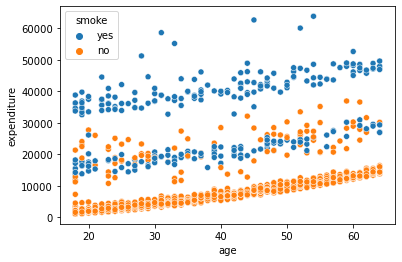

In [102]:
sns.scatterplot(x=df['age'],y=df['expenditure'],hue=df['smoke'])

- The expenditure is in the range of 40000-50000 for smoking people 
- The expenditure is in the range of 0-10000 for non smoking people

##  Draw distribution plot of expenditure

<AxesSubplot:xlabel='expenditure', ylabel='Density'>

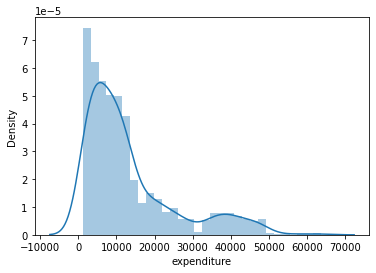

In [103]:
sns.distplot(df['expenditure'])

##  Display heatmap for the data

In [104]:
df.corr()

,age,bmi,dependent,expenditure
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
dependent,0.042469,0.012759,1.000000,0.067998
expenditure,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

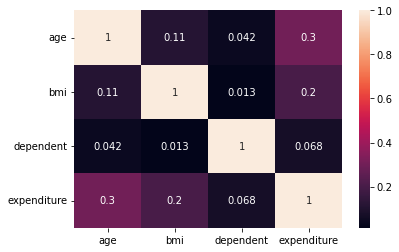

In [105]:
sns.heatmap(df.corr(),annot=True)